# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined=pd.merge(study_results,mouse_metadata,on="Mouse ID",how="left")

# Display the data table for preview
combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [49]:
# Checking the number of mice.
mouse_metadata["Mouse ID"].count()

249

In [2]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined.loc[combined.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

In [3]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id=pd.DataFrame(duplicate_mice)
duplicate_mouse_id

,0
0,g989


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# cleaned=combined.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
# cleaned.head()
cleaned=combined[combined['Mouse ID'].isin(duplicate_mice)==False]
cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice in the clean DataFrame.
cleaned = cleaned["Mouse ID"].unique()
mice_number_cleaned = len(cleaned)
mice_number_cleaned

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

start_drug_data = combined.set_index(['Drug Regimen'])
grouped_drug_data = start_drug_data.groupby("Drug Regimen")
start_drug_mean = grouped_drug_data["Tumor Volume (mm3)"].mean()
start_drug_median = grouped_drug_data["Tumor Volume (mm3)"].median()
start_drug_variance = grouped_drug_data["Tumor Volume (mm3)"].var()
start_drug_std = grouped_drug_data["Tumor Volume (mm3)"].std()
start_drug_sem = grouped_drug_data["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
drug_summary_df = pd.DataFrame({"Mean Tumor Volume": start_drug_mean,
                                "Median Tumor Volume": start_drug_median,
                                "Tumor Volume Variance": start_drug_variance,
                                "Tumor Volume Standard Deviation": start_drug_std,
                                "Tumor Volume Standard Error": start_drug_sem})
drug_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_drug_data = grouped_drug_data.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
agg_drug_data

/var/folders/k6/d0216ry509x6j4ccbxwt_cmc0000gn/T/ipykernel_52200/3455503006.py:5: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  agg_drug_data = grouped_drug_data.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

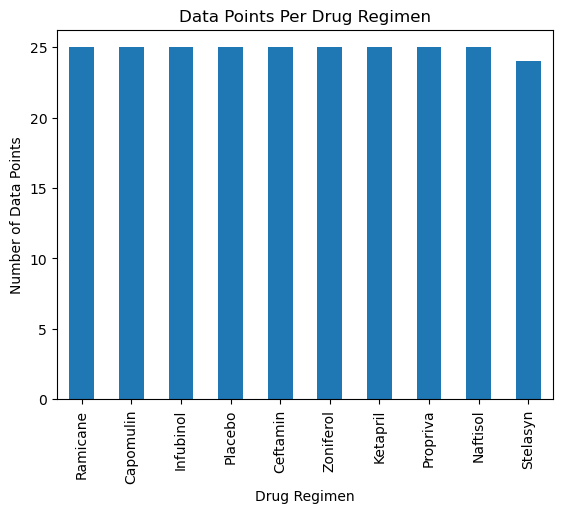

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_metadata["Drug Regimen"].value_counts().plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Data Points Per Drug Regimen")
plt.show()

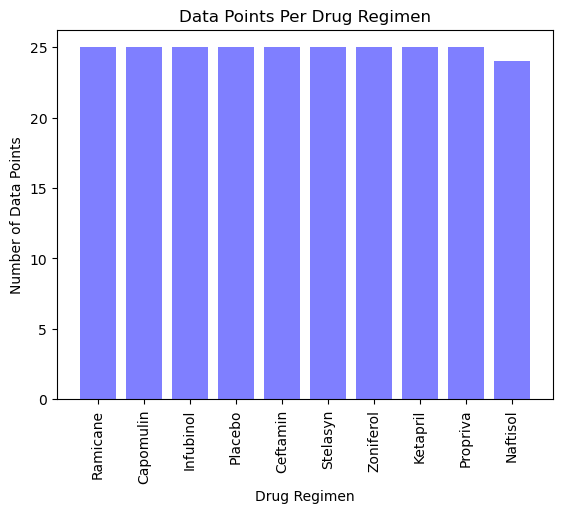

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mouse_metadata["Drug Regimen"].unique()
y_axis = mouse_metadata["Drug Regimen"].value_counts()
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Data Points Per Drug Regimen")
plt.xticks(rotation=90)
plt.show()


In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = mouse_metadata.groupby("Sex").count()
mouse_sex

,Mouse ID,Drug Regimen,Age_months,Weight (g)
Sex,,,,
Female,124,124,124,124
Male,125,125,125,125


ValueError: x must be 1D

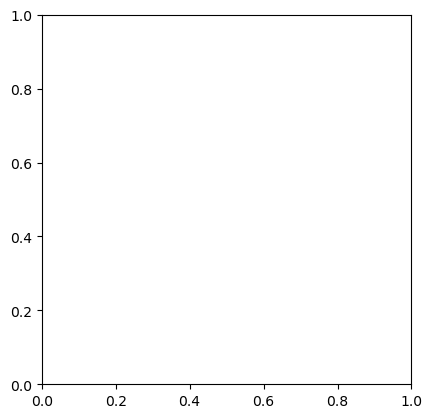

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = [mouse_sex["Mouse ID"]]
colors = ["blue", "orange"]
labels = ["Female","Male"]
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Male vs Female Mouse Population')
plt.show()


## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = combined.loc[combined["Drug Regimen"] == "Capomulin",:]
ramicane = combined.loc[combined["Drug Regimen"] == "Ramicane", :]
infubinol = combined.loc[combined["Drug Regimen"] == "Infubinol", :]
ceftamin = combined.loc[combined["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
caplast = capomulin.groupby('Mouse ID').max()['Timepoint']
caplastvol = pd.DataFrame(caplast)

ramlast = ramicane.groupby('Mouse ID').max()['Timepoint']
ramlastvol = pd.DataFrame(ramlast)

inflast = infubinol.groupby('Mouse ID').max()['Timepoint']
inflastvol = pd.DataFrame(inflast)

ceflast = ceftamin.groupby('Mouse ID').max()['Timepoint']
ceflastvol = pd.DataFrame(ceflast)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
caplastmerge = pd.merge(caplastvol, combined, on=("Mouse ID","Timepoint"),how="left")
caplastmerge.head()

ramlastmerge = pd.merge(ramlastvol, combined, on=("Mouse ID","Timepoint"),how="left")
ramlastmerge.head()

inflastmerge = pd.merge(inflastvol, combined, on=("Mouse ID","Timepoint"),how="left")
inflastmerge.head()

ceflastmerge = pd.merge(ceflastvol, combined, on=("Mouse ID","Timepoint"),how="left")
ceflastmerge.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = []
for drug in combined["Drug Regimen"]:
    if drug not in treatment:
        treatment.append(drug)
treatment

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:
    quartiles = combined[drug].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    upperq_list = []
    lowerq_list = []
    upperq_list.append(upperq)
    lowerq_list.append(lowerq)

upperq_list
lowerq_list
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

KeyError: 'Capomulin'

In [62]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [63]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [64]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [65]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
